## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,on='Mouse ID',how='outer')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].unique()
len(num_mice)

249

In [49]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merged_df[merged_df['Mouse ID'] != 'g989']
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
num_mice = new_df['Mouse ID'].unique()
len(num_mice)

248

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
sum_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': var, 'Standard Deviation': std, 'SEM': sem})
sum_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

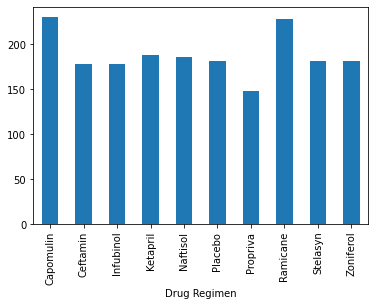

In [76]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_df = new_df.groupby('Drug Regimen')['Timepoint'].count()
bar_df.plot(kind='bar')

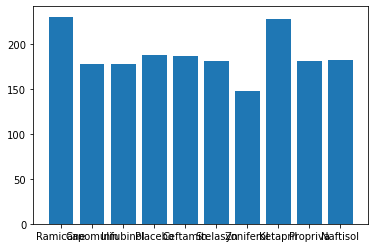

In [89]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimens = new_df['Drug Regimen'].unique()
plt.bar(regimens,bar_df.values)
plt.show()

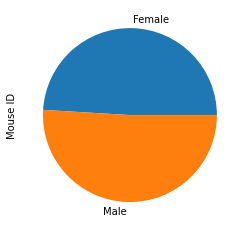

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_df = new_df.groupby('Sex')['Mouse ID'].count()
pie_df.plot(kind='pie')


([<matplotlib.patches.Wedge at 0x7fbc7c510250>,
 [Text(0.036089469908307935, 1.1994571897995099, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')])

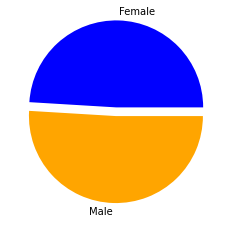

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1, 0)
colors = ['blue','orange']
plt.pie(pie_df.values,labels=pie_df.index,explode=explode, colors=colors)


## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df = new_df.groupby('Drug Regimen')['Timepoint'].max()
qob_df = new_df.loc[new_df['Timepoint']==45]
qob_df = qob_df.loc[qob_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin']),:]
# Start by getting the last (greatest) timepoint for each mouse
qob_df= qob_df[['Mouse ID','Tumor Volume (mm3)']]
qob_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Tumor Volume (mm3)
9,k403,22.050126
19,s185,23.343598
29,x401,28.484033
39,m601,28.430964
49,g791,29.128472
...,...,...
1797,x822,61.386660
1813,y163,67.685569
1845,y769,68.594745
1855,y865,64.729837


In [167]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = qob_df['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


outliers = qob_df.loc[(qob_df['Tumor Volume (mm3)'] > upperq + 1.5*iqr) | (qob_df['Tumor Volume (mm3)'] < lowerq - 1.5*iqr)]
len(outliers)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

0

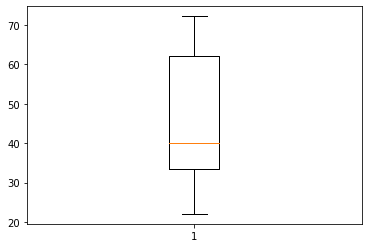

In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.boxplot(qob_df['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

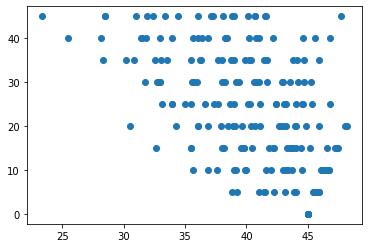

In [175]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tum_df= new_df[['Tumor Volume (mm3)','Timepoint']].loc[new_df['Drug Regimen']== 'Capomulin']
tumor_vol = [vol for vol in tum_df['Tumor Volume (mm3)']]
tumor_time = [time for time in tum_df['Timepoint']]
plt.scatter(tumor_vol,tumor_time)

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
